##  fetching data

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
x,y=mnist['data'],mnist['target']

In [4]:
%matplotlib inline

In [5]:
import matplotlib
import matplotlib.pyplot as plt

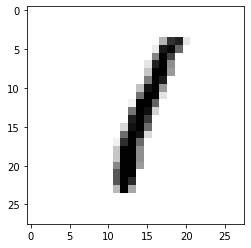

In [6]:
some_digit=x[3602]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [7]:
x_train,x_test=x[:6000],x[6000:7000]
y_train,y_test=y[:6000],y[6000:7000]

In [8]:
import numpy as np
np.random.seed(42)
shuffeled_index=np.random.permutation(6000)
x_train,y_train=x_train[shuffeled_index],y_train[shuffeled_index]


## creating a 2 detector

In [9]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

## creating a classifier


In [10]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1)
clf.fit(x_train,y_train_2)

c:\new folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [12]:
clf.predict([some_digit])

array([False])

## doing cross validation

In [15]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")
                  

c:\new folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\new folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

In [16]:
a.mean()


0.9543333333333334

## quiz part

In [19]:
y_train_not2=(y_train!=2)
y_test_not2=(y_test!=2)

In [21]:
clf.fit(x_train,y_train_not2)
clf.predict([some_digit])

c:\new folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ True])

In [22]:
new_a=cross_val_score(clf,x_train,y_train_not2,cv=3,scoring="accuracy")
new_a.mean()

c:\new folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\new folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

0.9543333333333334

In [23]:
from joblib import dump,load
dump(clf,'Digit_recognation.joblib')

['Digit_recognation.joblib']